In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check the shape of the data
print(df.shape)

# Check the data types
print(df.dtypes)

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


In [5]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values with the median or mean
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [6]:
# List of categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
df_encoded.head()


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,No,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [8]:
# List of numerical columns to be scaled
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the scaled DataFrame
df_encoded.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,-1.277445,-1.160323,-0.994242,No,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,0.066327,-0.259629,-0.173244,No,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,-1.236724,-0.362660,-0.959674,Yes,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,0.514251,-0.746535,-0.194766,No,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,-1.236724,0.197365,-0.940470,Yes,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
# Target variable
y = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Features
X = df_encoded.drop(['Churn', 'customerID'], axis=1)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




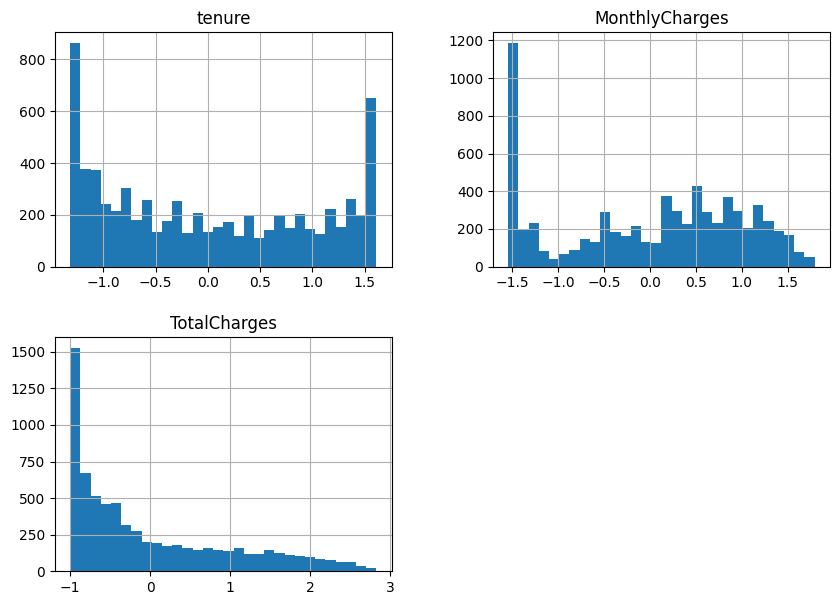

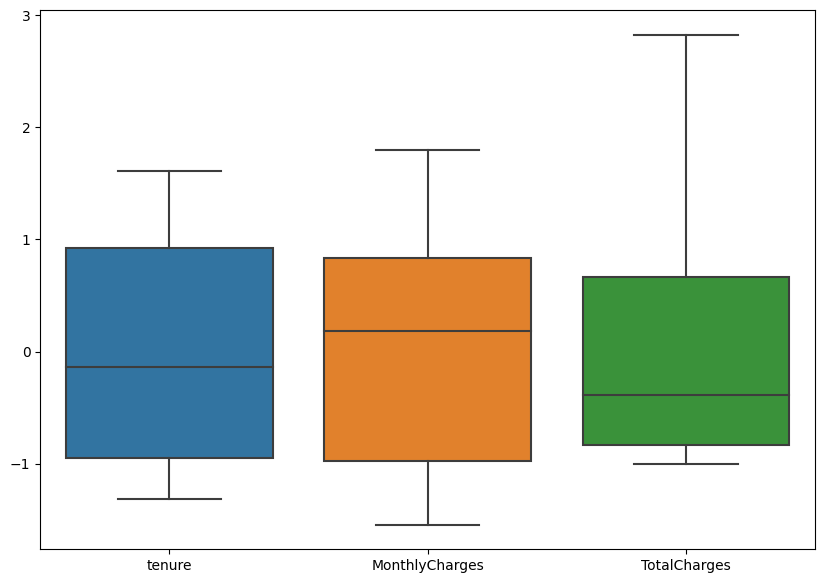

In [16]:
# Histograms for numerical features
df_encoded[numerical_columns].hist(bins=30, figsize=(10, 7))
plt.show()

# Box plots for numerical features
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_encoded[numerical_columns])
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_776\2394935172.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')


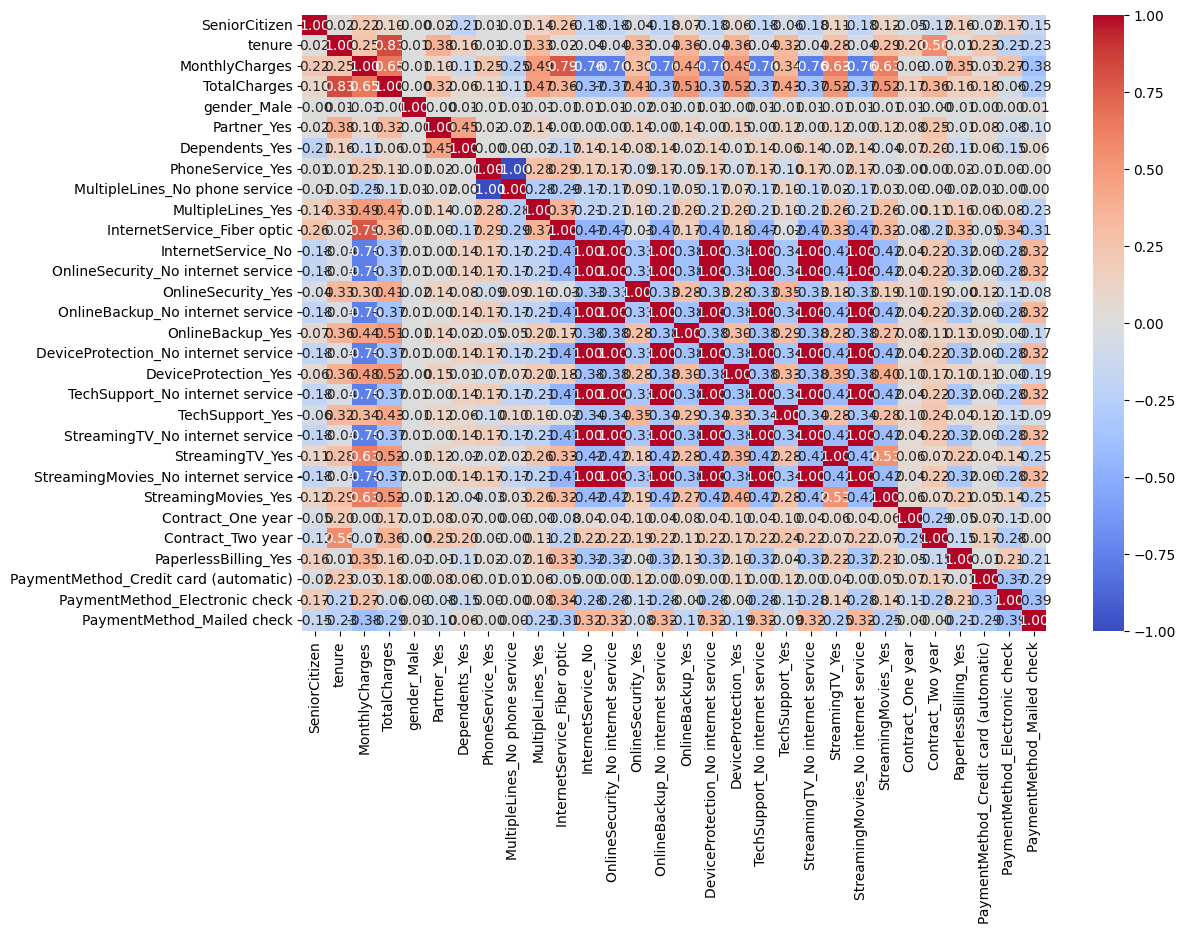

In [17]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [18]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [19]:
# Train a model on the  data
model = MLPClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Train a model on the  data
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Train a model on the  data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    

In [ ]:
# Train a model on the  data
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))